# Basic Operations in TensorFlow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Basic constant operations


In [2]:
a = tf.constant(3)
b = tf.constant(4)

### Launch the default graph

In [3]:
with tf.Session() as sess:
    print "Addition", sess.run(a+b)
    print "Multiplication", sess.run(a*b)

Addition 7
Multiplication 12


### Basic Operations with variable as graph input

In [4]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [5]:
a

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int16>

### Define some operations

In [6]:
add = tf.add(a, b)
mul = tf.mul(a, b)

In [7]:
mul

<tf.Tensor 'Mul:0' shape=<unknown> dtype=int16>

### Launch the default graph

In [8]:
with tf.Session() as sess:
    print "Addition with variables: {}".format(sess.run(add, feed_dict={a:3, b:4}))
    print "Multiplication with variables: {}".format(sess.run(mul, feed_dict={a:3, b:4}))

Addition with variables: 7
Multiplication with variables: 12


### Matrix Multiplication

In [9]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])

In [10]:
product = tf.matmul(matrix1, matrix2)

In [11]:
with tf.Session() as sess:
    print "Matrix multiplication: {}".format(sess.run(product))

Matrix multiplication: [[ 12.]]


In [14]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

In [19]:
# %% Construct a tf.Session to execute the graph.
sess = tf.Session()
result = sess.run(x)

In [20]:
result

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [22]:
sess.close()
sess = tf.InteractiveSession()

In [21]:
# %% Now a tf.Operation
# We'll use our values from [-3, 3] to create a Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

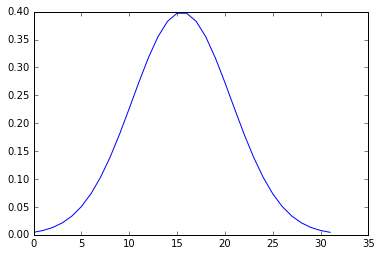

In [26]:
plt.plot(z.eval())
plt.show()

In [27]:
# %% We can find out the shape of a tensor like so:
print(z.get_shape())

(32,)


In [28]:
# %% Or in a more friendly format
print(z.get_shape().as_list())

[32]


In [29]:
print(tf.shape(z).eval())

[32]


In [30]:
# %% We can combine tensors like so:
print(tf.pack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [33]:
# %% Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

In [36]:
tf.shape(z_2d).eval()

array([32, 32], dtype=int32)

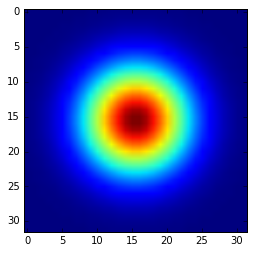

In [37]:
# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())

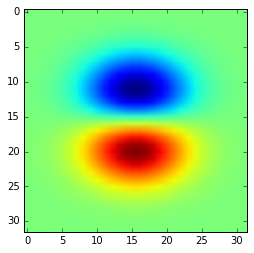

In [38]:
# %% For fun let's create a gabor patch:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.mul(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())

In [39]:
# %% We can also list all the operations of a graph:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

[u'Const', u'Const_1', u'add', u'mul', u'Placeholder', u'Placeholder_1', u'Add', u'Mul', u'Const_2', u'Const_3', u'MatMul', u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace', u'sub/y', u'sub', u'Pow/y', u'Pow', u'Pow_1/x', u'Pow_1/y', u'Pow_1', u'mul_1/x', u'mul_1', u'div', u'Neg', u'Exp', u'Sqrt/x', u'Sqrt', u'mul_2/x', u'mul_2', u'div_1/x', u'div_1', u'mul_3', u'Shape', u'Shape_1', u'Shape_2', u'pack/values_2', u'pack/values_3', u'pack', u'Reshape/shape', u'Reshape', u'Reshape_1/shape', u'Reshape_1', u'MatMul_1', u'Reshape_2/shape', u'Reshape_2', u'Reshape_3/shape', u'Reshape_3', u'MatMul_2', u'Shape_3', u'LinSpace_1/start', u'LinSpace_1/stop', u'LinSpace_1/num', u'LinSpace_1', u'Sin', u'Reshape_4/shape', u'Reshape_4', u'ones_like/Shape', u'ones_like/Const', u'ones_like', u'Reshape_5/shape', u'Reshape_5', u'MatMul_3', u'Mul_1']


In [40]:
# %% Lets try creating a generic function for computing the same thing:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.mul(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

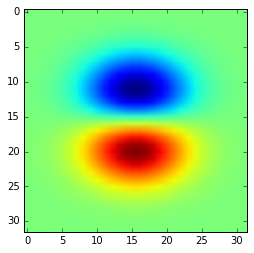

In [41]:
# %% Confirm this does something:
plt.imshow(gabor().eval())

In [43]:
# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(2, [W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

(512, 512, 3)


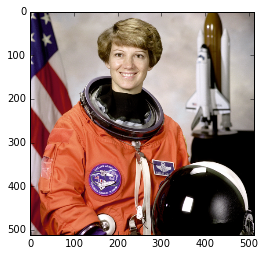

In [112]:
# %% Load up an image:
from skimage import data
#img = data.rocket()
img = data.astronaut()
#img = data.coffee()
plt.imshow(img)
print(img.shape)

In [113]:
# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

In [114]:
# %% And a graph which can convolve our image with a gabor
out = convolve(x, gabor(n_values=5, sigma=1.0, mean=5.0))

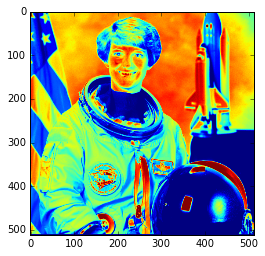

In [115]:
# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)

In [3]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

add = tf.add(a,b)
mul = tf.mul(a,b)

with tf.Session() as sess:
    print(sess.run(add, feed_dict = {a:4, b:7}))
    print(sess.run(mul, feed_dict = {a:4, b:7}))

11
28


In [4]:
matrix = np.array([[1,2],[3,4]])
M = tf.placeholder(tf.int16, shape = matrix.shape)
b = tf.placeholder(tf.int16)

add = tf.add(M,b)

with tf.Session() as sess:
    print(sess.run(add, feed_dict = {M: matrix, b:1}))

[[2 3]
 [4 5]]


In [3]:
matrix = np.array([[1,2],[3,4]])
vect1 = np.array([[1,2,3]])
vect2 = np.array([[4],[5],[6]])

M = tf.placeholder(tf.float32, shape = matrix.shape)
v1 = tf.placeholder(tf.float32, shape = vect1.shape)
v2 = tf.placeholder(tf.float32, shape = vect2.shape)

square = tf.pow(M, 2)
max_index = tf.argmax(M, 0)
inner_dot = tf.squeeze(tf.matmul(v1, v2))
outer_dot = tf.matmul(v2, v1)

with tf.Session() as sess:
    print "square:"
    print(sess.run(square, feed_dict={M:matrix}))
    print "argmax:"
    print(sess.run(max_index, feed_dict={M:matrix}))
    print "inner dot product"
    print(sess.run(inner_dot, feed_dict={v1: vect1, v2:vect2}))
    print "outer dot product"
    print(sess.run(outer_dot, feed_dict={v1: vect1, v2:vect2}))

square:
[[  1.   4.]
 [  9.  16.]]
argmax:
[1 1]
inner dot product
32.0
outer dot product
[[  4.   8.  12.]
 [  5.  10.  15.]
 [  6.  12.  18.]]


In [4]:
sess = tf.InteractiveSession()

In [6]:
a = [0.0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
x = tf.placeholder(tf.float32)
y = tf.sin(x)
dy = tf.gradients(y, x)
grad = dy[0]
grad.eval(feed_dict={x: a})

array([  1.00000000e+00,   7.07106769e-01,  -4.37113883e-08,
        -7.07106769e-01,  -1.00000000e+00], dtype=float32)

In [7]:
matrix = np.array([[1,2],[3,4]])
vector = np.array([[2],[3]])
bias = np.array([[1],[1]])

A = tf.placeholder(tf.float32, shape = matrix.shape)
x = tf.placeholder(tf.float32, shape = vector.shape)
b = tf.placeholder(tf.float32, shape = bias.shape)

QF = tf.add(
    0.5 * tf.matmul(
        tf.matmul(x, A, transpose_a=True), x),
    tf.matmul(b, x, transpose_a=True))

dy = tf.gradients(QF, x)
grad = dy[0]

grad.eval(feed_dict={A: matrix, x: vector, b: bias})

array([[ 10.5],
       [ 18. ]], dtype=float32)

In [12]:
#sess = tf.InteractiveSession()

In [15]:
# Construct Graph input nodes
vector = np.array([0.0, 0.0, 0.0])
target = np.array([1.0, 2.0, 3.0])

init_vect = tf.constant(vector, tf.float32, vector.shape)
x = tf.Variable(init_vect, name='x')

y = tf.placeholder(tf.float32, shape=target.shape, name='target')

In [16]:
# Construct Graph operations
err = x - y
cost = - tf.exp((-0.5) * tf.reduce_sum(tf.pow(err,2)))
train_op = tf.train.MomentumOptimizer(1.0, 0.8).minimize(cost)

In [17]:
# Start a session
sess = tf.Session()

# Run the Op to initialize the variables.
init = tf.initialize_all_variables()
sess.run(init)

for i in xrange(100):
    
    _, loss_value = sess.run([train_op, cost], feed_dict={y: target})

    if i % 10 == 0:
        print i, ": ", x.eval(session=sess)
        print "Cost: ", loss_value
        print 

0 :  [ 0.00091188  0.00182376  0.00273565]
Cost:  -0.000911882

10 :  [ 0.03806224  0.07612447  0.11418672]
Cost:  -0.00142914

20 :  [ 0.1235975   0.24719499  0.37079248]
Cost:  -0.00396154

30 :  [ 0.53256768  1.06513536  1.59770298]
Cost:  -0.0936908

40 :  [ 1.13304842  2.26609683  3.39914536]
Cost:  -0.970853

50 :  [ 0.9893558   1.97871161  2.96806741]
Cost:  -0.984317

60 :  [ 0.98598981  1.97197962  2.95796967]
Cost:  -0.999873

70 :  [ 1.00056481  2.00112963  3.0016942 ]
Cost:  -0.99983

80 :  [ 1.00153148  2.00306296  3.00459456]
Cost:  -0.999997

90 :  [ 1.00001526  2.00003052  3.00004601]
Cost:  -0.999998



In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.python.framework import ops
from tensorflow.python.ops import constant_op
from tensorflow.python.training import optimizer
from tensorflow.python.training import training_ops

In [14]:
class MomentumOp(optimizer.Optimizer):
    """
    Optimizer that implements the Momentum algorithm.
    """

    def __init__(self, learning_rate, momentum,
               use_locking=False, name="Momentum"):

        #super(MomentumOptimizer, self).__init__(use_locking, name)
        self._learning_rate = learning_rate
        self._momentum = momentum
        self._name = 'momentum'

    def _create_slots(self, var_list):
        for v in var_list:
            self._zeros_slot(v, "momentum", self._name)

    def _prepare(self):
        self._learning_rate_tensor = ops.convert_to_tensor(self._learning_rate,
                                                       name="learning_rate")
        self._momentum_tensor = ops.convert_to_tensor(self._momentum,
                                                  name="momentum")

    def _apply_dense(self, grad, var):
        mom = self.get_slot(var, "momentum")
        return training_ops.apply_momentum(
            var, mom,
            self._learning_rate_tensor, grad, self._momentum_tensor,
            use_locking=self._use_locking).op

    def _apply_sparse(self, grad, var):
        mom = self.get_slot(var, "momentum")
        return training_ops.sparse_apply_momentum(
            var, mom,
            self._learning_rate_tensor, grad.values, grad.indices,
            self._momentum_tensor, use_locking=self._use_locking).op

In [11]:
MO = MomentumOp(0.1, 0.8)

In [15]:
# Construct Graph input nodes
vector = np.array([0.0, 0.0, 0.0])
target = np.array([1.0, 2.0, 3.0])

with tf.name_scope('x'):
    init_vect = tf.constant(vector, tf.float32, vector.shape)
    x = tf.Variable(init_vect, name='x')
    #_ = tf.scalar_summary('x', x)

with tf.name_scope('target'):
    y = tf.placeholder(tf.float32, shape=target.shape, name='target')

In [16]:
# Construct Graph operations
with tf.name_scope('Error'):
    err = x - y
    
with tf.name_scope('Cost'):
    cost = - tf.exp((-0.5) * tf.reduce_sum(tf.pow(err,2)))
    _ = tf.scalar_summary('cost', cost)

with tf.name_scope('train'):
    train_op = MomentumOp(1.0, 0.8).minimize(cost)

AttributeError: 'MomentumOp' object has no attribute '_slots'

In [10]:
summary_op = tf.merge_all_summaries()

# Start a session
sess = tf.Session()

# Run the Op to initialize the variables.
init = tf.initialize_all_variables()
sess.run(init)

# Instantiate a SummaryWriter to output summaries and the Graph.
summary_writer = tf.train.SummaryWriter('logs/',
                                        graph_def=sess.graph_def)

for i in xrange(100):
    
    _, loss_value = sess.run([train_op, cost], feed_dict={y: target})
    
    # Update the events file.
    summary_str = sess.run(summary_op, feed_dict={y: target})
    summary_writer.add_summary(summary_str)
    
    if i % 10 == 0:
        print(i, ": ", x.eval(session=sess))
        print("Cost: ", loss_value)
        print

InvalidArgumentError: You must feed a value for placeholder tensor 'target/target' with dtype float and shape [3]
	 [[Node: target/target = Placeholder[dtype=DT_FLOAT, shape=[3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op u'target/target', defined at:
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/traitlets/config/application.py", line 589, in launch_instance
    app.start()
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-bee380ac6c3c>", line 11, in <module>
    y = tf.placeholder(tf.float32, shape=target.shape, name='target')
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 742, in placeholder
    name=name)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 583, in _placeholder
    name=name)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 655, in apply_op
    op_def=op_def)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2040, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1087, in __init__
    self._traceback = _extract_stack()
